### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

### Dataset source URL

In [3]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

### Attribute Information
|||
|-|-|
|mpg|continuous|
|cylinders|multi-valued discrete|
|displacement|continuous|
|horsepower|continuous|
|weight|continuous|
|acceleration|continuous|
|model year|multi-valued discrete|
|origin|multi-valued discrete|
|car name|string (unique for each instance)|

In [4]:
column_names = [
    'MPG',
    'Cylinders',
    'Displacement',
    'Horsepower',
    'Weight',
    'Acceleration',
    'Model Year',
    'Origin'
]

In [5]:
raw_dataset = pd.read_csv(
    url,
    names=column_names,
    na_values='?',
    comment='\t',
    sep=' ',
    skipinitialspace=True
)

In [6]:
dataset = raw_dataset.copy()
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
# Checking if there are any NaN
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [8]:
dataset[dataset.Horsepower.isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


In [9]:
# Dropping rows with NaN
dataset.dropna(inplace=True)

In [9]:
dataset[dataset.Horsepower.isna()]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin


In [10]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [11]:
dataset.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [12]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
Cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
Displacement,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
Weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
Acceleration,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
Model Year,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
Origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


In [13]:
print(
    sorted(dataset.Cylinders.unique()),
    sorted(dataset['Model Year'].unique()),
    sorted(dataset.Origin.unique()),
    sep='\n'
)

[3, 4, 5, 6, 8]
[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82]
[1, 2, 3]


In [10]:
# pd.get_dummies It converts categorical data into dummy or indicator variables.
# This is very similar to One-Hot-Encoding
dataset = pd.get_dummies(dataset, columns=['Origin'], prefix='', prefix_sep='')

In [11]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,1,2,3
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [12]:
dataset.rename({'1': 'USA', '2': 'Europe', '3': 'Japan'}, axis='columns', inplace=True)
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### Observarions
- Cylinders is a categorical column
- Gives an hint to check if Cylinders is categorial on every other feature

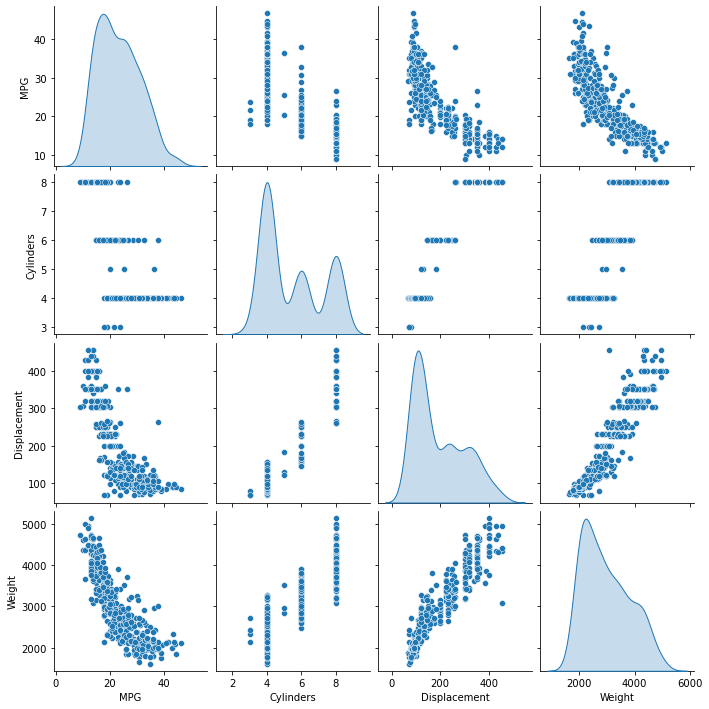

In [22]:
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

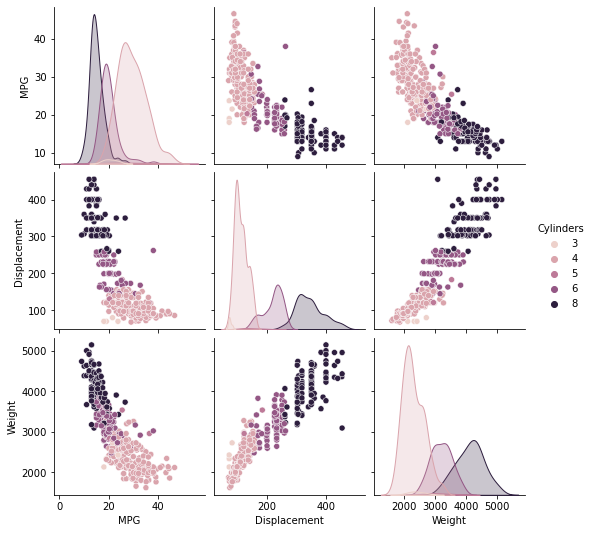

In [24]:
sns.pairplot(dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde', hue='Cylinders')

In [32]:
X = dataset.loc[:, dataset.columns != 'MPG']
y = dataset.loc[:, dataset.columns == 'MPG']

In [33]:
X.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,1,0,0


In [34]:
y.head()

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [36]:
print(
    f'''
    X_train = {len(X_train)}, X_test = {len(y_train)},
    y_train = {len(X_test)}, y_test = {len(y_test)}
    '''
)


    X_train = 235, X_test = 235,
    y_train = 157, y_test = 157
    


In [37]:
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
63,8,400.0,175.0,4385.0,12.0,72,1,0,0
205,4,97.0,75.0,2155.0,16.4,76,0,0,1
141,4,98.0,83.0,2219.0,16.5,74,0,1,0
121,8,318.0,150.0,3399.0,11.0,73,1,0,0
290,8,351.0,142.0,4054.0,14.3,79,1,0,0


In [38]:
X_test.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
386,6,181.0,110.0,2945.0,16.4,82,1,0,0
31,4,113.0,95.0,2228.0,14.0,71,0,0,1
280,6,231.0,115.0,3245.0,15.4,79,1,0,0
267,4,134.0,95.0,2560.0,14.2,78,0,0,1
0,8,307.0,130.0,3504.0,12.0,70,1,0,0


In [39]:
y_train.head()

,MPG
63,14.0
205,28.0
141,29.0
121,15.0
290,15.5


In [40]:
y_test.head()

,MPG
386,25.0
31,25.0
280,21.5
267,27.5
0,18.0


In [41]:
X_train.reset_index(drop=True, inplace=True)
X_train.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,8,400.0,175.0,4385.0,12.0,72,1,0,0
1,4,97.0,75.0,2155.0,16.4,76,0,0,1
2,4,98.0,83.0,2219.0,16.5,74,0,1,0
3,8,318.0,150.0,3399.0,11.0,73,1,0,0
4,8,351.0,142.0,4054.0,14.3,79,1,0,0


In [42]:
X_test.reset_index(drop=True, inplace=True)
X_test.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,6,181.0,110.0,2945.0,16.4,82,1,0,0
1,4,113.0,95.0,2228.0,14.0,71,0,0,1
2,6,231.0,115.0,3245.0,15.4,79,1,0,0
3,4,134.0,95.0,2560.0,14.2,78,0,0,1
4,8,307.0,130.0,3504.0,12.0,70,1,0,0


In [43]:
y_train.reset_index(drop=True, inplace=True)
y_train.head()

,MPG
0,14.0
1,28.0
2,29.0
3,15.0
4,15.5


In [44]:
y_test.reset_index(drop=True, inplace=True)
y_test.head()

,MPG
0,25.0
1,25.0
2,21.5
3,27.5
4,18.0


In [45]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Cylinders,235.0,5.548936,1.732282,3.0,4.0,4.0,8.00,8.0
Displacement,235.0,199.659574,107.861433,71.0,105.0,151.0,302.00,455.0
Horsepower,235.0,106.936170,40.492167,46.0,76.0,95.0,135.00,230.0
Weight,235.0,3001.374468,871.057121,1613.0,2244.5,2800.0,3709.00,4955.0
Acceleration,235.0,15.358723,2.783352,8.0,13.5,15.2,17.25,23.7
Model Year,235.0,75.914894,3.716617,70.0,73.0,76.0,79.00,82.0
USA,235.0,0.638298,0.481519,0.0,0.0,1.0,1.00,1.0
Europe,235.0,0.165957,0.372837,0.0,0.0,0.0,0.00,1.0
Japan,235.0,0.195745,0.397620,0.0,0.0,0.0,0.00,1.0


### Normalization

In [38]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [39]:
normalizer.adapt(np.array(X_train))

In [40]:
print(normalizer.mean)

tf.Tensor(
[[   5.553  199.396  107.068 3011.017   15.42    75.94     0.643    0.149
     0.209]], shape=(1, 9), dtype=float32)


In [41]:
X_train.mean()

Cylinders          5.553191
Displacement     199.395745
Horsepower       107.068085
Weight          3011.017021
Acceleration      15.419574
Model Year        75.940426
USA                0.642553
Europe             0.148936
Japan              0.208511
dtype: float64

In [42]:
horsepower = np.array(X_train.Horsepower)

In [43]:
horsepower_normalizer = tf.keras.layers.Normalization(input_shape=[1, ], axis=None)

In [44]:
horsepower_normalizer.adapt(horsepower)

### Keras Sequential model

In [45]:
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(units=1)
])

In [46]:
horsepower_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [47]:
horsepower_model.predict(horsepower[:10])

array([[ 0.066],
       [ 0.106],
       [-0.054],
       [-0.056],
       [-0.105],
       [ 0.047],
       [ 0.017],
       [ 0.057],
       [ 0.103],
       [ 0.005]], dtype=float32)

In [48]:
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [49]:
%%time
history = horsepower_model.fit(
    X_train.Horsepower,
    y_train,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

Wall time: 2.41 s


In [50]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

In [51]:
hist.head()

,loss,val_loss,epoch
0,23.101833,22.045273,0
1,22.493683,21.458742,1
2,21.892931,20.875546,2
3,21.285242,20.280313,3
4,20.683731,19.692970,4


In [52]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)

In [53]:
test_results = {}
test_results['horsepower_model'] = horsepower_model.evaluate(
    X_test.Horsepower,
    y_test,
    verbose=0
)

In [54]:
test_results

{'horsepower_model': 4.149678707122803}

In [55]:
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)

In [56]:
def plot_horsepower(x, y):
    plt.scatter(X_train.Horsepower, y_train, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()

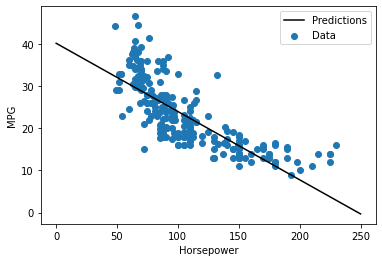

In [57]:
plot_horsepower(x, y)

### Linear regression with multiple inputs

In [58]:
linear_model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(units=1)
])

In [59]:
linear_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 10        
                                                                 
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________


In [60]:
linear_model.predict(X_train[:10])

array([[ 0.197],
       [ 0.914],
       [-0.748],
       [-1.203],
       [-1.091],
       [ 0.876],
       [-0.746],
       [ 1.209],
       [ 2.05 ],
       [-0.744]], dtype=float32)

In [61]:
linear_model.layers[1].kernel

<tf.Variable 'dense_1/kernel:0' shape=(9, 1) dtype=float32, numpy=
array([[-0.349],
       [-0.326],
       [-0.303],
       [-0.033],
       [-0.437],
       [ 0.234],
       [-0.342],
       [-0.208],
       [ 0.202]], dtype=float32)>

In [62]:
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error'
)

In [63]:
%%time
history = linear_model.fit(
    X_train,
    y_train,
    epochs=100,
    verbose=0,
    validation_split=0.2
)

Wall time: 2.33 s


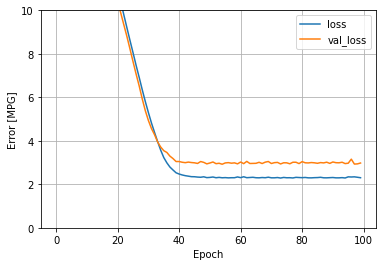

In [64]:
plot_loss(history)

In [65]:
test_results['linear_model'] = linear_model.evaluate(
    X_test, 
    y_test, 
    verbose=0
)

# Regression with a deep neural network (DNN)

In [66]:
model = tf.keras.Sequential([
    horsepower_normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [67]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 1)                3         
 ion)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                128       
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [68]:
model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

In [69]:
%%time
history = model.fit(
    X_train.Horsepower,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

Wall time: 2.54 s


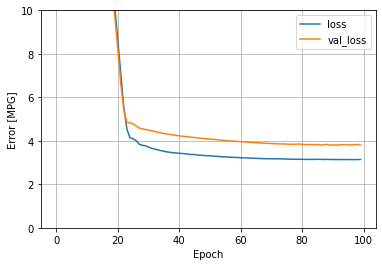

In [70]:
plot_loss(history)

In [71]:
x = tf.linspace(0.0, 250, 251)
y = model.predict(x)

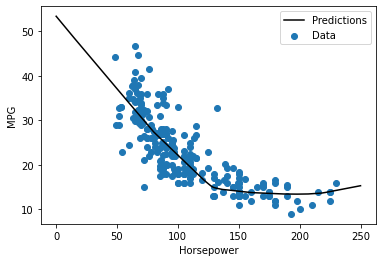

In [72]:
plot_horsepower(x, y)

### Regression using a DNN and multiple inputs

In [73]:
model = tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [74]:
model.compile(
    loss = 'mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [75]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 9)                19        
 n)                                                              
                                                                 
 dense_5 (Dense)             (None, 64)                640       
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,884
Trainable params: 4,865
Non-trainable params: 19
_________________________________________________________________


In [76]:
%%time
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    verbose=0
)

Wall time: 2.51 s


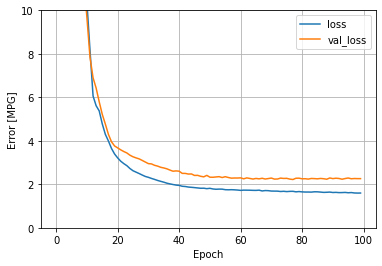

In [77]:
plot_loss(history)

In [78]:
test_results['model'] = model.evaluate(X_test, y_test, verbose=0)

In [79]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,4.149679
linear_model,2.681154
model,1.806318


In [80]:
test_predictions = model.predict(X_test).flatten()

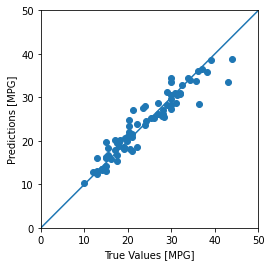

In [81]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [82]:
error = test_predictions - np.array(y_test).reshape(-1)

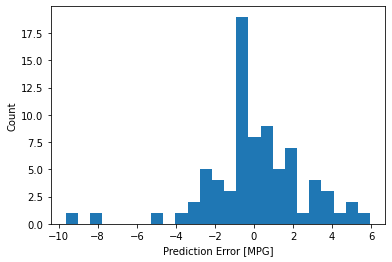

In [83]:
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

In [84]:
model.save('dnn_model')

INFO:tensorflow:Assets written to: dnn_model\assets


In [85]:
reloaded = tf.keras.models.load_model('dnn_model')

In [86]:
test_results['reloaded'] = reloaded.evaluate(X_validation, y_validation, verbose=0)

In [87]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
horsepower_model,4.149679
linear_model,2.681154
model,1.806318
reloaded,1.906012
